# COMP 755 -- Probability, Likelihood, Parameter Optimization

We will review some of the probability theory you have seen before.

Then we will dive into fitting our first model by maximizing likelihood.

Throughout the course, you will see the same blueprint over and over again.

# Samples space, events, probabilities

Sample space ($\Omega$) 

Event $A \subset \Omega$ 

Probabilty of an event $0\leq p(A) \leq 1$

$p(\Omega) = 1, p(\emptyset) = 0, p(\neg A) = 1 - p(A)$

# Random variables

Random variable $X$ takes on values from a state space with some probability

* Heads or tails, $X \in \{\textrm{heads},\textrm{tails}\}$
* Roll of a die, $X \in \{1,2,3,4,5,6\}$
* Even or odd roll of a die, $X \in \{\textrm{even},\textrm{odd}\}$

Probability of random variable $X$ assuming particular value $x$ 
$$
p(X = x)
$$

# Basic probabilty rules
## _Union_
$$
\begin{aligned}
    p (A \vee B) &= p(A) + p(B) - p(A \wedge B)& \\
    &= p(A) + p(B) &(\textrm{if } A  \cap  B = \emptyset)
\end{aligned}
$$


$$
p(\textrm{'Die rolled 1'} \vee \textrm{'Die rolled 6'}) = p(\textrm{'Die rolled 1'}) + p(\textrm{'Die rolled 6'})
$$

## _Joint and conditional probabilities_

Joint probability:
$$
p(A, B) = p(A \wedge B)
$$


Factoring joint probability:
$$    
p(A, B) = p(A\big|B)p(B) = p(B\big|A)p(A)
$$

Read $p(A|B)$ as: "What is the probability of event $A$ given that we know that $B$ occurred?"

More succinctly, **probability of A given B**. 

## Chain rule
We will use conditional probabilities to build complex models.
$$
p(X_1,X_2,X_3,...,X_n) = p(X_1)p(X_2\big|X_1)p(X_3\big|X_2,X_1) ... p(X_n\big|X_{1:n-1})
$$
where $X_{1:n-1}$ is shorthand for $X_1,X_2,...,X_{n-1}$

## Marginal probabilities

Extract probability for a subset of random variables.
$$
p(A) = \sum_b p(A,B=b) = \sum_b p(A\big|B=b)p(B=b).
$$


## Bayes rule

$$
p(B\big|A) = \frac{p(A,B)}{p(A)} = \frac{p(A\big|B)p(B)}{p(A)} = \frac{p(A\big|B)p(B)}{\sum_b p(A\big|B=b)p(B=b)}
$$

Crucial for learning and inference.



# Probabilities sum to 1

Remember that for some discrete random variable $A$ with state space $\mathcal{A}$ 
$$
\sum_{a \in \mathcal{A}}  p(A=a) = 1 
$$


Further
$$
\sum_{a \in \mathcal{A}}  p(A=a|B) = 1 
$$
and also
$$
\sum_{a \in \mathcal{A}}  p(A=a|B,C) = 1 
$$

but 
$$
\sum_{a \in \mathcal{A}}  p(A=a,B|C) \neq 1 
$$


However,
$$
\sum_{a \in \mathcal{A}}\sum_{b \in \mathcal{B}}  p(A=a,B=b|C)  = 1 
$$

Hence, sum across all possible assignments to random variables on the left side of the bar will be one.
$$
\sum_{a \in \mathcal{A}} ... \sum_{X \in \mathcal{X}} p(A=a,B=b,...,X=x|Y=y) = 1
$$


# Marginalization

Joint probabilities usually involve all of the variables in your model
$$
p(X,Y,Z) 
$$
Examples of Marginal probabilities that can be obtained from this joint probability
$$ p(X) = \sum_{y}\sum_{z} p(X,Y=y,Z=z)$$

$$ p(Y) = \sum_{x}\sum_{z} p(X=x,Y, Z=z) $$

$$ p(X,Z) = \sum_{y} p(X,Y=y,Z) $$

Operation of computing the marginal probability is called **marginalization**.


# A simple probabilitic model
Two random variables $LW \in \{0,1\}$ and $R \in \{0,1\}$

* LW = 0, lawn is dry
* LW = 1, lawn is wet
* R = 0, no rain
* R = 1, rain

$$
p(R=0) = 0.9\\
p(R=1) = ?
$$
and
$$
\begin{aligned}
p(LW=0\big|R=0) = 0.75& & p(LW=0\big|R=1) = 0.05\\
p(LW=1\big|R=0) = 0.25& & p(LW=1\big|R=1) = 0.95 
\end{aligned}
$$


In [12]:
p_r = [0.9, 0.1]           # probability of rain must sum up to 1
p_l_r = [ [0.75, 0.05],    # p(LW=0 | R=0 )=0.75    p(LW = 0| R=1 )=0.05
          [0.25, 0.95] ];  # p(LW=1 | R=0 )=0.25    p(LW = 1| R=1 )=0.95
print ("Sanity check:")
print ("p(LW=0|R=0) + p(LW=1|R=0) =", p_l_r[0][0] + p_l_r[1][0])
print ("p(LW=0|R=1) + p(LW=1|R=1) =", p_l_r[0][1] + p_l_r[1][1])

Sanity check:
p(LW=0|R=0) + p(LW=1|R=0) = 1.0
p(LW=0|R=1) + p(LW=1|R=1) = 1.0


# A simple probabilitic model

Let's express **marginal probability** $p(LW)$ using $p(LW\big|R)$ and $p(R)$:

$$
P(LW) = \sum_{r \in \{0,1\}} p(LW|R = r) p(R = r)
$$


In [13]:
p_l = [0,0] # preallocate for ease

p_l[0] = p_l_r[0][1]*p_r[1] + p_l_r[0][0]*p_r[0]
print ("Probability of lawn not being wet", p_l[0])

p_l[1] =  p_l_r[1][0]*p_r[0] + p_l_r[1][1]*p_r[1]
print ("Probability of lawn being wet", p_l[1])
print ("Sanity check: p(L=0) + p(L=1) =", p_l[0] + p_l[1])

Probability of lawn not being wet 0.68
Probability of lawn being wet 0.32
Sanity check: p(L=0) + p(L=1) = 1.0


# Some commonly used discrete distributions -- Notation

We will look at following distributions
* Bernoulli (coin toss) 
* Categorical (die roll)
* Binomial (counts of heads and tails after multiple tosses)
* Multinomial (counts of different sides of dies after multiple rolls)

We will use $\sim$ to indicate that a random variable is assumes values according to a distribution $ X \sim \textrm{Bernoulli}(\theta)$

Each of the distributions has **parameters** -- $\theta$ above. 

To indicate dependence of random variables on parameters we will add parameters behind the conditioning bar 
$$
p(X\big|\theta).
$$


# Some commonly used discrete distributions -- Bernoulli


* Bernoulli distributed random variable X will be denoted as
$$
X \sim \textrm{Bernoulli}(\theta)
$$
State space is $\{0,1\}$ -- think coin toss. Parameter $\theta \in [0,1]$ specifies probability of one of the outcomes
$$
\begin{aligned}
p(X = 1\big|\theta) &= \theta \\
p(X = 0\big|\theta) &= 1 - \theta.
\end{aligned}
$$
Note that we can write this out more compactly as:
$$
p(X = x\big|\theta) = \theta^x(1-\theta)^{1-x}
$$

# Some commonly used discrete distributions -- Categorical
* Categorical distribution is a generalization of Bernoulli to more than two outcomes -- think rollin a $k$-sided die. 
$$
X \sim \textrm{Categorical}(\theta_1,\theta_2,...,\theta_{k-1})
$$
State space is $\{1,2,3,...,k\}$. Parameters $\theta_1,..\theta_{k-1}$ specify probability of outcomes $1,...k-1$
$$
\begin{aligned}
p(X = 1\big|\theta_1,..\theta_{k-1}) &= \theta_1 \\
p(X = 2\big|\theta_1,..\theta_{k-1}) &= \theta_2 \\
...\\
p(X = k-1\big|\theta_1,..\theta_{k-1}) &= \theta_{k-1} \\
p(X = k\big|\theta_1,..\theta_{k-1}) &= 1 - \sum_{i=1}^{k-1} \theta_{k-1} = \theta_k
\end{aligned}
$$
We note that $\theta_k$ is not a parameter but rather computed from parameters for convience.

Q: What constraints must we have on $\theta_i$s in order for $p(\cdot)$ to be a distribution?


# Some commonly used discrete distributions -- Binomial and Multinomial

Binomial and Multinomial distributions are generalizations of Bernoulli and Categorical distributrions.

Instead of a single trial, a coin toss or die roll, we consider outcomes across multiple trials, multiple coin tosses and die rolls. 

$$
\begin{aligned}
X &\sim \textrm{Binomial}(n,\theta)\\
p(X = k\big|n,\theta) &= \binom{n}{k}\theta^k(1-\theta)^{n-k}
\end{aligned}
$$
where
$$
\binom{n}{k} = \frac{n!}{(n-k)!k!}
$$

A random variable distributed according to Multinomial distribution is a vector of counts. 
For example, count of 1s, 2s, 3s, 4s, 5s, 6s observed after multiple six dies rolls.
$$
\begin{aligned}
X = (X_1,X_2,...,X_k) &\sim \textrm{Multinomial}(n,\theta)\\
p(X = \mathbf{x}\big|n,\theta) &= \binom{n}{x_1\dots x_k }\prod_{j=1}^k\theta_j^{x_j}
\end{aligned}
$$
where
$$
\binom{n}{x_1\dots x_k } = \frac{n!}{x_1!x_2!\cdots x_k!}
$$

Theta =  [0.2, 0.2, 0.2, 0.2, 0.2]
[1 2 4 5 2 4 5 4 1 3 4 1 2 5 4 2 3 5 4 1 1 3 1 2 5 4 1 2 2 3 4 4 3 1 1 3 5
 4 4 2 1 5 4 3 5 5 4 4 1 2 2 3 1 5 2 1 1 2 1 4 5 1 3 3 3 4 4 5 4 4 3 5 4 1
 3 2 4 3 1 2 5 1 4 5 2 1 5 3 3 3 2 2 5 5 2 5 4 2 4 2]


Text(0,0.5,'count')

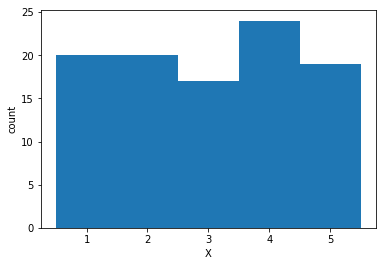

In [16]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline  
theta = [1.0/5.0]*5 # this makes an array of length 5 with entries all being 1.0/5.0
print ("Theta = ", theta)
state_space = [1,2,3,4,5]
x = numpy.random.choice(state_space,size=100,p=theta)
print (x)
plt.hist(x,bins=[0.5,1.5,2.5,3.5,4.5,5.5],align='mid')
plt.xlabel('X')
plt.ylabel('count')

In [18]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline  
theta = [0.1,0.5,0.2,0.01,0.19] 
assert(abs(numpy.sum(theta) - 1.0)<1e-10) # why abs(... - ...)<1e-10?
print ("Theta = ", theta)
n = 20;
for i in range(5):
    x = numpy.random.multinomial(n,theta)
    print ("Counts of different outcomes across n =", n, "trials:", x)


Theta =  [0.1, 0.5, 0.2, 0.01, 0.19]
Counts of different outcomes across n = 20 trials: [3 9 4 0 4]
Counts of different outcomes across n = 20 trials: [ 2 10  2  0  6]
Counts of different outcomes across n = 20 trials: [ 1 10  3  0  6]
Counts of different outcomes across n = 20 trials: [ 2 13  3  0  2]
Counts of different outcomes across n = 20 trials: [1 9 7 0 3]


# Intermission

* Probabilities and their representations: tables vs analytic specification.

* Everything thus far was generative in nature: given parameters generate data.

* Learning works in the opposite direction: find thetas that explain the data.

* When working with discrete probabilities make sure that things "add up"

* We will frequently use marginalization and Bayes rule since they are crucial in inference



# Continuous distributions

Continous distributions spread their probability across infinite sets of possible outcomes (think real values).

As a consequence, we can no longer simply sum over possible outcomes. Rather we integrate over the domain of the random variable.
$$
\int_x p(X = x) dx = 1
$$

Marginalization
$$
p(A) = \int_b p(A,B=b) db 
$$

Bayes rule:
$$
p(B\big|A) = \frac{p(A,B)}{p(A)} = \frac{p(A\big|B)p(B)}{p(A)} = \frac{p(A\big|B)p(B)}{\int_b p(A\big|B=b)p(B=b) db}
$$

# Continuous distributions -- Gaussian

$X$ is distributed according to normal (or Gaussian) distribution with mean $\mu$ and variance $\sigma^2$
$$ 
\begin{aligned}
X &\sim \mathcal{N}(\mu,\sigma^2) \\
p(X = x\big|\mu,\sigma^2)&= \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
\end{aligned}
$$

Note that the variance is $\sigma^2$ and standard deviation is $\sigma$.



# Continuous distributions -- Gaussian

Since you know that
$$
p(X = x\big|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2} 
$$
and
$$
\int_x p(X = x\big|\mu,\sigma^2) dx = 1 
$$
then you can say that
$$
\int_x \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2} dx= 1.
$$



Q: 
$$
 \int_x e^{-\frac{1}{2\sigma^2}(x-\mu)^2} dx = ?
$$



Mean: 0.98589551727 Standard Deviation: 1.01974282752
Mean: 10.0263562281 Standard Deviation: 1.00041998277
Mean: -7.00823412957 Standard Deviation: 1.9604215166


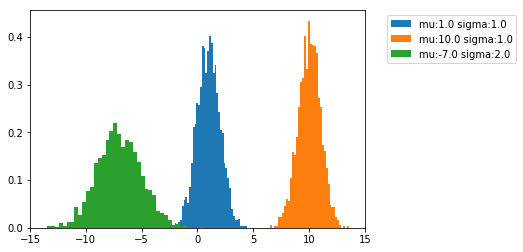

In [19]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline  
mus =    [1.0,10.0,-7.0]
sigmas = [1.0, 1.0, 2.0]
for (mu,sigma) in zip(mus,sigmas):
    x = numpy.random.normal(mu,sigma,2000)
    print ("Mean: " + str(numpy.mean(x)) + " Standard Deviation: " + str(numpy.std(x)))
    plt.xlim(-15,15)
    plt.hist(x,40,normed=True,label='mu:'+str(mu)+' sigma:'+str(sigma))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Continuous distributions -- Laplace


$X$ is distributed according to Laplace distribution with location $\mu$ and scale $b$
$$ 
\begin{aligned}
X &\sim \textrm{Laplace}(\mu,b) \\
p(X = x\big|\mu,b))&= \frac{1}{2b}\exp{\left\{-\frac{|x - \mu|}{b}\right\}} \\
\end{aligned}
$$

Location and scale are analogous to mean and variance in normal distribution. 

Let's generate some data from Laplace distribution.

Location: 1.00022756191 Scale: 1.00759503392
Location: 10.0254415278 Scale: 1.01661212847
Location: -6.94413433604 Scale: 1.92228713737


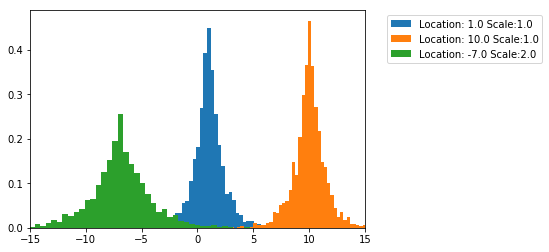

In [20]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline  
locs =    [1.0,10.0,-7.0]
scales = [1.0, 1.0, 2.0]
for (loc,scale) in zip(locs,scales):
    x = numpy.random.laplace(loc,scale,2000)
    print ("Location: " + str(numpy.mean(x)) + " Scale: " + str(numpy.sqrt(numpy.var(x)/2)))    
    plt.hist(x,50,normed=True,label="Location: "+str(loc)+' Scale:'+str(scale))
    plt.xlim(-15,15)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Parameters and likelihood function

Say we performed $N$ coin tosses and obtained a sequence of heads and tails
$$
\mathbf{x} = \{1,0,1,1,0,1,1,0...\}
$$

Q: If we wanted to predict the result of the next coin toss what should we do?
[Your first guess is probably right.]


# Parameters and likelihood function

Each of the coin tosses can be thought of as a realization of a random variable.

Hence we can write probability of the data $\mathbf{x}$.

$$
p(\mathbf{x}|\theta) = \prod_{i=1}^N p(X = x_i|\theta) = \prod_{i=1}^N \theta^{x_i}(1-\theta)^{1-x_i}
$$
Pluging in different $\theta$s give different probability of the data.

Q: Could this help us figure out what the next toss could be?

In [21]:
def likelihood(theta,xs):
    p = 1.0
    for x in xs:
        p = p*(theta**x * (1-theta)**(1-x))
    return p

xs = [0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1]
n_heads = numpy.sum(xs)  #  since count of ones is the same as sum of all entries in xs
n_tails = len(xs) - n_heads 
print ('Number of heads: ', n_heads)
print ('Number of tails: ', n_tails)
print (likelihood(0.6,xs))
print (likelihood(0.5,xs))
print (likelihood(11.0/26.0,xs))

Number of heads:  11
Number of tails:  15
3.895503726512704e-09
1.4901161193847656e-08
2.029464109446502e-08


# Parameters and likelihood function

Hence, we can try to find parameter $\theta$ for which $p(\mathbf{x}|\theta)$ is the largest.

$p(\mathbf{x}|\theta)$ can be seen as a function of **parameter** $\theta$.

This function is called *likelihood* 
$$
\mathcal{L(\theta|\mathbf{x})} = p(\mathbf{x}|\theta)
$$

$\theta$ which results in the largest likelihood is called **maximum-likelihood estimate**.

In many cases, learning is nothing more than maximizing likelihood.

# Specifying optimization problems

Optimization problems such as finding maximum of likelihood are typically written in a particular form.

Maximization problem:
$$
\begin{aligned}
\mathop{\textrm{maximize}}_{\theta}&& f(\theta)
\end{aligned}
$$
Equivalent minimization problem:
$$
\begin{aligned}
\mathop{\textrm{minimize}}_{\theta}&& -f(\theta)
\end{aligned}
$$


# Specifying optimization problems

We need to distinguish between **minimum** of a function and a **minimizer** of a function.

Minimum is the least value that the function achieves, minimizer is the argument for which the minimum is achived. 

For example: $f(x) = 6 + (x-1)^2$ has minimum of $6$. That minimum is achieved at $x=1$. Hence, its minimizer is $1$.

[-2.         -1.84615385 -1.69230769 -1.53846154 -1.38461538 -1.23076923
 -1.07692308 -0.92307692 -0.76923077 -0.61538462 -0.46153846 -0.30769231
 -0.15384615  0.          0.15384615  0.30769231  0.46153846  0.61538462
  0.76923077  0.92307692  1.07692308  1.23076923  1.38461538  1.53846154
  1.69230769  1.84615385  2.          2.15384615  2.30769231  2.46153846
  2.61538462  2.76923077  2.92307692  3.07692308  3.23076923  3.38461538
  3.53846154  3.69230769  3.84615385  4.        ]


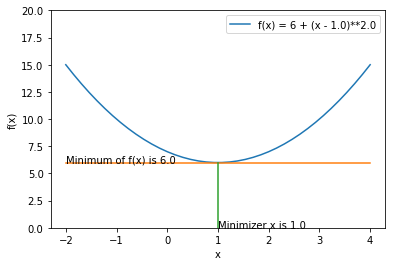

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
xlimits = [-2,4]
ylimits = [0,20]
x = numpy.linspace(xlimits[0],xlimits[1],40)
print (x)
y = 6 + (x - 1.0)**2.0
plt.plot(x,y,label = 'f(x) = 6 + (x - 1.0)**2.0')
plt.ylim([ylimits[0],ylimits[1]])
plt.plot([xlimits[0], xlimits[1]],[6.0, 6.0])
plt.plot([1.0,1.0],[ylimits[0],6.0])
plt.annotate('Minimizer x is 1.0',(1.0,ylimits[0]))
plt.annotate('Minimum of f(x) is 6.0',(xlimits[0],6.0))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()


# Specifying optimization problems
Minimum is value of function -- output --, minimizer is value of function's argument -- input.

* Minimum: $$ \mathop{\textrm{min}}_x f(x)$$
* Minimizer: $$ \mathop{\textrm{argmin}}_x f(x)$$
* Maximum: $$ \mathop{\textrm{max}}_x f(x)$$
* Maximizer: $$ \mathop{\textrm{argmax}}_x f(x)$$

# Transforming optimization problems

Monotonic transformations of functions do not change location of their minimizers/maximizers

* $\mathop{\textrm{argmin}}_x f(x) = \mathop{\textrm{argmin}}_x f(x) + c$
* $\mathop{\textrm{argmin}}_x f(x) = \mathop{\textrm{argmin}}_x cf(x)$, $c>0$
* $\mathop{\textrm{argmin}}_x f(x) = \mathop{\textrm{argmin}}_x \log f(x)$
* $\mathop{\textrm{argmin}}_x f(x) = \mathop{\textrm{argmin}}_x \exp f(x)$


[-2.         -1.84615385 -1.69230769 -1.53846154 -1.38461538 -1.23076923
 -1.07692308 -0.92307692 -0.76923077 -0.61538462 -0.46153846 -0.30769231
 -0.15384615  0.          0.15384615  0.30769231  0.46153846  0.61538462
  0.76923077  0.92307692  1.07692308  1.23076923  1.38461538  1.53846154
  1.69230769  1.84615385  2.          2.15384615  2.30769231  2.46153846
  2.61538462  2.76923077  2.92307692  3.07692308  3.23076923  3.38461538
  3.53846154  3.69230769  3.84615385  4.        ]


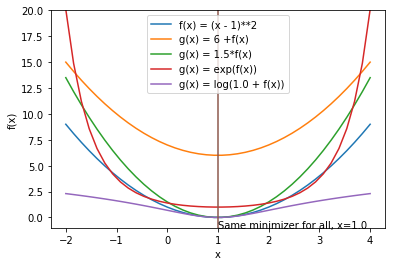

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
xlimits = [-2,4]
ylimits = [-1.0,20]
x = numpy.linspace(xlimits[0],xlimits[1],40)
print (x)
y = (x - 1.0)**2.0
plt.plot(x,y,label = 'f(x) = (x - 1)**2')
plt.plot(x,y+6.0, label = 'g(x) = 6 +f(x)')
plt.plot(x,y*1.5, label = 'g(x) = 1.5*f(x)')
plt.plot(x,numpy.exp(1./3.*y), label = 'g(x) = exp(f(x))')
plt.plot(x,numpy.log(1.0 + y), label = 'g(x) = log(1.0 + f(x))')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(ylimits)
plt.annotate('Same minimizer for all, x=1.0',(1.0,ylimits[0]))
plt.plot([1.0,1.0],[ylimits[0],ylimits[1]])
plt.legend()

# Log-likelihood

Maximization of likelihood can be tricky when datasets are large. Computing product of probabilities, by definition smaller than 1, can easily underflow.

Typically, we maximize likelihood by finding maxima of log-likelihood. The location of the maximum's of these two functions coincide, and the only difference is that we avoid numerical problems.

$$
\log \mathcal{L}(\theta|\mathbf{x}) = \log p(\mathbf{x}|\theta) = \log \prod_i p(x_i|\theta) = \sum_i \log p(x_i|\theta)
$$

In general, we will compute log probabilities and only convert them to probabilities when we need to perform marginalization. 

In [24]:
from math import log
theta = 0.1
n_h = 400
n_t = 400
print (theta**n_h*(1.0 - theta)**n_t)
print (log(theta)*n_h + log(1.0 - theta)*n_t)

0.0
-963.1782434607487


# Maximizing likelihood 

Log-Likelihood in detail:
$$
\log \mathcal{L}(\theta|\mathbf{x}) = \sum_i \log p(x_i|\theta)
$$
We plug in our Bernoulli distribution
$$
p(x_i|\theta) = \theta^{x_i} (1-\theta)^{1 - x_i}
$$
and its log is
$$
\log p(x_i|\theta) = {x_i}\log \theta + (1-x_i)\log(1-\theta)
$$
Putting it all together
$$
\log \mathcal{L}(\theta|\mathbf{x}) = \sum_i \left[{x_i}\log \theta + (1-x_i)\log(1-\theta)\right]
$$



In [25]:
def loglikelihood(theta,xs):
    lp = 0.0
    for x in xs:
        lp = lp + numpy.log(theta)*x  + numpy.log(1-theta)*(1-x)
    return lp
xs = [0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,1]
print (loglikelihood(0.6,xs) )
print (loglikelihood(0.5,xs) )
print (loglikelihood(11.0/26.0,xs)) 

-19.3634428395
-18.0218266946
-17.7129089712


# Maximizing likelihood  

Our coin toss example:

Data: $$
\mathbf{x} = \{0,1,0,0,1,0,1,0,1,...\}
$$
Log-Likelihood: 
$$
\log \mathcal{L}(\theta|\mathbf{x}) = \log p(\mathbf{x}|\theta) = \log \prod_i p(x_i|\theta) = \sum_i \log p(x_i|\theta)
$$
Maximum likelihood estimate: $$\theta^{\textrm{ML}} = \mathop{\textrm{argmax}}_\theta \log \mathcal{L}(\theta|\mathbf{x})$$

Q: How do we find maxima/minima of functions?

# Finding maximum/minimum of a function

For a differentiable function $f(\cdot)$, $x$ is a critical point if it's first derivative at that point is zero.
$$
f'(x) = 0
$$

A critical point may be a maximizer, minimizer of a saddle point.

You can check whether you have a minimizer or maximizer inspect second derivative.

Convex functions have nonnegative second derivative $\forall x, f''(x) \geq 0$.
For a convex function, $f'(x) = 0$ implies that $x$ is a global minimizer.

Concave functions have nonpositive second derivative $\forall x, f''(x) \leq 0$.
For a concave function, $f'(x) = 0$ implies that $x$ is a global maximizer.

For next few weeks, all the optimization problems will be convex. 

Notation: I will write $\frac{\partial}{\partial x} f(x)$ to make it clear which derivative we are computing.


# Finding maximum/minimum of log-likelihood

Coin toss example again:
$$
\log \mathcal{L}(\theta|\mathbf{x}) = \sum_i \left[{x_i}\log \theta + (1-x_i)\log(1-\theta)\right]
$$
Let's compute first derivative
$$
\frac{\partial}{\partial \theta}\log \mathcal{L}(\theta|\mathbf{x}) = \sum_i \left[{x_i}\frac{1}{\theta} + (1-x_i)(-\frac{1}{1 - \theta})\right]
$$


# Finding maximum/minimum of log-likelihood

To find best $\theta$ we equate the derivative $\frac{\partial}{\partial \theta}\log \mathcal{L}(\theta|\mathbf{x})$ to zero  and solve
$$
\frac{\partial}{\partial \theta}\log \mathcal{L}(\theta|\mathbf{x}) = 0 
$$

# Finding maximum/minimum of log-likelihood
For our coin toss example this amounts to:
$$
\begin{aligned}
\sum_i \left[{x_i}\frac{1}{\theta} + (1-x_i)\frac{-1}{1 - \theta}\right] = 0\\
\sum_i {x_i}\frac{1}{\theta} - \sum_i (1-x_i)\frac{1}{1 - \theta} &= 0\\
\sum_i {x_i}\frac{1}{\theta} &= \sum_i (1-x_i)\frac{1}{1 - \theta} \\
\frac{1}{\theta}\underbrace{\sum_i {x_i}}_{n_h} &= \frac{1}{1 - \theta}\underbrace{\sum_i (1-x_i)}_{n_t} \\
(1 - \theta)n_h &= \theta n_t\\
n_h  &= \theta (n_t+n_h)\\
\theta &= \frac{n_h}{n_t + n_h}
\end{aligned}
$$

Anti-climactic? Reassuring? From the first principles?

# Exercise: Find MLE for parameter $\mu$ of Gaussian distributed data

$$
\begin{aligned}
\log \mathcal{L}(\mu|\mathbf{x}) &= \sum_{i=1}^N \log \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2} \\
&= \sum_{i=1}^N \left[-\frac{1}{2}\log 2\pi\sigma^2 - \frac{1}{2\sigma^2}(x_i-\mu)^2\right] \\
\end{aligned}
$$
Equate to zero and solve
$$
\frac{\partial}{\partial \mu} \log \mathcal{L}(\mu|\mathbf{x}) = 0
$$
Hints: 
1. Recall that a constant added to a function does not change location of its minimizer.
2. The answer is mean of the ${x_1,...,x_N}$. The point of the exercise is to get there. 

Please do this before next lecture. I will solve it at the beginning of the lecture. 

# If you want to run the code in this notebook ...


1. Install Anaconda. 
2. Download the notebook from the course webpage. 
3. In Anaconda command prompt:
```
cd <directory_where_you_saved_the_notebook>
jupyter notebook
```
4. A browser window will pop up. Click on the notebook file (COMP 755 Lect2.ipynb)
5. Mess with it as much as you like.
